In [1]:
import numpy as np
import pandas as pd

##### Download and Collect the data

In [2]:
rawdata = pd.read_sas('LLCP2023.XPT', format='xport')

In [3]:
rawdata.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,b'03012023',b'03',b'01',b'2023',1100.0,b'2023000001',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0,1.0,1.0,9.0
1,1.0,1.0,b'01062023',b'01',b'06',b'2023',1100.0,b'2023000002',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,b'03082023',b'03',b'08',b'2023',1100.0,b'2023000003',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,b'03062023',b'03',b'06',b'2023',1100.0,b'2023000004',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,b'01062023',b'01',b'06',b'2023',1100.0,b'2023000005',2.023000e+09,1.0,...,7.000000e+00,1.0,4.700000e+01,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [4]:
# select the column we need to use
'''
Each variable has their meaning as follows
'DIABETE4'  : (Ever told) you had diabetes << this is our dependent variable
'_BMI5'     : Computed body mass index
'_RFBMI5'   : Overweight or obese calculated variable
'_RFHYPE6'  : High Blood Pressure Calculated Variable
'TOLDHI3'   : Ever Told Cholesterol Is High
'_CHOLCH3'  : Cholesterol Checked Calculated Variable
'CHCKDNY2'  : Ever told you have kidney disease?
'SMOKE100'  : Smoked at Least 100 Cigarettes
'_RFDRHV8'  : Heavy Alcohol Consumption  Calculated Variable
'CVDSTRK3'  : Ever Diagnosed with a Stroke
'_MICHD'    : Ever had CHD or MI
'_TOTINDA'  : Leisure Time Physical Activity Calculated Variable
'GENHLTH'   : General Health
'PHYSHLTH'  : Number of Days Physical Health Not Good
'MENTHLTH'  : Number of Days Mental Health Not Good
'DIFFWALK'  : Difficulty Walking or Climbing Stairs
'_HLTHPL1'  : Have any health insurance
'MEDCOST1'  : Could Not Afford To See Doctor
'CHECKUP1'  : Length of time since last routine checkup
'_SEX'      : Calculated sex variable
'_AGEG5YR'  : Reported age in five-year age categories calculated variable
'EDUCA'     : Computed level of education completed categories
'INCOME3'   : Computed income categories
'''

selected_columns = ['DIABETE4', '_BMI5', '_RFBMI5', '_RFHYPE6', 
                    'TOLDHI3', '_CHOLCH3', 'CHCKDNY2', 'SMOKE100',
                    '_RFDRHV8', 'CVDSTRK3', '_MICHD', '_TOTINDA',
                    'GENHLTH', 'PHYSHLTH', 'MENTHLTH',
                    'DIFFWALK', '_HLTHPL1', 'MEDCOST1', 'CHECKUP1',
                    '_SEX', '_AGEG5YR', 'EDUCA', 'INCOME3']

In [5]:
# extract the select columns onto new dataframe
data = rawdata[selected_columns]

##### Perform EDA procedures

In [6]:
data.head()

,DIABETE4,_BMI5,_RFBMI5,_RFHYPE6,TOLDHI3,_CHOLCH3,CHCKDNY2,SMOKE100,_RFDRHV8,CVDSTRK3,...,PHYSHLTH,MENTHLTH,DIFFWALK,_HLTHPL1,MEDCOST1,CHECKUP1,_SEX,_AGEG5YR,EDUCA,INCOME3
0,1.0,3047.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,1.0,1.0,2.0,2.0,2.0,13.0,5.0,99.0
1,3.0,2856.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,2.0,1.0,2.0,2.0,2.0,13.0,5.0,99.0
2,3.0,2231.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,6.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,4.0,2.0
3,3.0,2744.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,...,2.0,88.0,1.0,1.0,2.0,3.0,2.0,12.0,5.0,99.0
4,1.0,2585.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,1.0,1.0,2.0,1.0,2.0,12.0,5.0,7.0


In [7]:
data.shape

(433323, 23)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DIABETE4  433318 non-null  float64
 1   _BMI5     392788 non-null  float64
 2   _RFBMI5   433323 non-null  float64
 3   _RFHYPE6  433323 non-null  float64
 4   TOLDHI3   381511 non-null  float64
 5   _CHOLCH3  433323 non-null  float64
 6   CHCKDNY2  433320 non-null  float64
 7   SMOKE100  413649 non-null  float64
 8   _RFDRHV8  433323 non-null  float64
 9   CVDSTRK3  433319 non-null  float64
 10  _MICHD    428738 non-null  float64
 11  _TOTINDA  433323 non-null  float64
 12  GENHLTH   433319 non-null  float64
 13  PHYSHLTH  433320 non-null  float64
 14  MENTHLTH  433320 non-null  float64
 15  DIFFWALK  417177 non-null  float64
 16  _HLTHPL1  433323 non-null  float64
 17  MEDCOST1  433321 non-null  float64
 18  CHECKUP1  433321 non-null  float64
 19  _SEX      433323 non-null  float64
 20  _AGE

In [9]:
data.isna().sum()

DIABETE4        5
_BMI5       40535
_RFBMI5         0
_RFHYPE6        0
TOLDHI3     51812
_CHOLCH3        0
CHCKDNY2        3
SMOKE100    19674
_RFDRHV8        0
CVDSTRK3        4
_MICHD       4585
_TOTINDA        0
GENHLTH         4
PHYSHLTH        3
MENTHLTH        3
DIFFWALK    16146
_HLTHPL1        0
MEDCOST1        2
CHECKUP1        2
_SEX            0
_AGEG5YR        0
EDUCA           9
INCOME3      8075
dtype: int64

In [10]:
# if we try to dropna, we will 
print(f'If we drop the data, we still have {data.dropna().shape[0]} rows to work with.')
print(f'Btw, we lost the data by {round(((1 - (data.dropna().shape[0] / data.shape[0]))*100),2)} percent.')

If we drop the data, we still have 338867 rows to work with.
Btw, we lost the data by 21.8 percent.


In [11]:
# If we go with dropping it, then.
data.dropna(inplace=True)

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\1347236882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


##### Data Cleansing
In accordance with Codebook's description, we found that we still need to do some data cleansing for analysis purpose before proceed. We will go through each columns as follows:

#1 DIABETE4 :  (Ever told) you had diabetes.

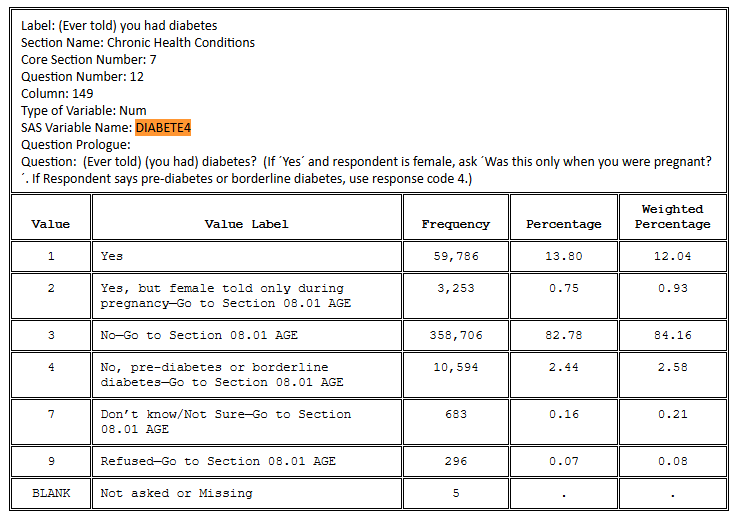

In [12]:
# 1. DIABETE4
'''
3, and 4 as 0 (no diabetes identified)
1, and 2 as 1 (diabetes identified)

drop 7, and 9 from the datasets
'''

# drop the value 7 and 9
data.drop(data[(data['DIABETE4'] == 7) | (data['DIABETE4'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['DIABETE4'] = data['DIABETE4'].replace({1:1, 2:1, 3:0, 4:0})

# check the value
data['DIABETE4'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\457564763.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['DIABETE4'] == 7) | (data['DIABETE4'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\457564763.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DIABETE4'] = data['DIABETE4'].replace({1:1, 2:1, 3:0, 4:0})


array([1., 0.])

In [13]:
data['_BMI5'].isna().sum()

np.int64(0)

In [14]:
# 2. _BMI5
'''
Divide the provided values by 100. then do the roundings into nearest integer.

No particular integer to drop.
'''

data['_BMI5'] = round(data['_BMI5']/100, 0)

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\3511828738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_BMI5'] = round(data['_BMI5']/100, 0)


In [15]:
# 3. _RFBMI5
'''
1 as 0 (not overweight or obese)
2 as 1 (overweight or obese)

drop 9 from the datasets
'''

# drop the value 7 and 9
data.drop(data[(data['_RFBMI5'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['_RFBMI5'] = data['_RFBMI5'].replace({1:0, 2:1})

# check the value
data['_RFBMI5'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2961610834.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_RFBMI5'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2961610834.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_RFBMI5'] = data['_RFBMI5'].replace({1:0, 2:1})


array([1., 0.])

In [16]:
data.shape

(338433, 23)

In [17]:
# 4. _RFHYPE6
'''
1 as 0 (no high blood pressure identified)
2 as 1 (high blood pressure identified)

drop 7, and 9 from the datasets
'''

# drop the value 7 and 9
data.drop(data[(data['_RFHYPE6'] == 7) | (data['_RFHYPE6'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['_RFHYPE6'] = data['_RFHYPE6'].replace({1:0, 2:1})

# check the value
data['_RFHYPE6'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\92290913.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_RFHYPE6'] == 7) | (data['_RFHYPE6'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\92290913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_RFHYPE6'] = data['_RFHYPE6'].replace({1:0, 2:1})


array([1., 0.])

In [18]:
# 5. TOLDHI3
'''
2 as 0 (no high cholesterol identified)
1 as 1 (high chloresterol identified) >> leave it as it is.

drop 7 and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['TOLDHI3'] == 7) | (data['TOLDHI3'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['TOLDHI3'] = data['TOLDHI3'].replace({2:0})

# check the value
data['TOLDHI3'].unique()


C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2361962716.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['TOLDHI3'] == 7) | (data['TOLDHI3'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2361962716.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TOLDHI3'] = data['TOLDHI3'].replace({2:0})


array([0., 1.])

In [19]:
# 6. _CHOLCH3
'''
2, and 3 as 0 (no cholesterol check up for the past 5 years)
1 as 1 (cholesterol check up for the past 5 years) >> leave it as it is.

drop 7 and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['_CHOLCH3'] == 7) | (data['_CHOLCH3'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['_CHOLCH3'] = data['_CHOLCH3'].replace({2:0, 3:0})

# check the value
data['_CHOLCH3'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\459788979.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_CHOLCH3'] == 7) | (data['_CHOLCH3'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\459788979.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_CHOLCH3'] = data['_CHOLCH3'].replace({2:0, 3:0})


array([1., 0.])

In [20]:
# 7. CHCKDNY2
'''
2 as 0 (no kidney disease identified)
1 as 1 (kidney disease identified (uncontrollable urine flow)) >> leave it as it is.

drop 7 and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['CHCKDNY2'] == 7) | (data['CHCKDNY2'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['CHCKDNY2'] = data['CHCKDNY2'].replace({2:0})

# check the value
data['CHCKDNY2'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2061910287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['CHCKDNY2'] == 7) | (data['CHCKDNY2'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2061910287.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CHCKDNY2'] = data['CHCKDNY2'].replace({2:0})


array([0., 1.])

In [21]:
# 8. SMOKE100
'''
2 as 0 (no smoking for the last 100 days)
1 as 1 (smoking for the last 100 days) >> leave it as it is.

drop 7 and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['SMOKE100'] == 7) | (data['SMOKE100'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['SMOKE100'] = data['SMOKE100'].replace({2:0})

# check the value
data['SMOKE100'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2222861531.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['SMOKE100'] == 7) | (data['SMOKE100'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2222861531.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMOKE100'] = data['SMOKE100'].replace({2:0})


array([0., 1.])

In [22]:
# 9. _RFDRHV8
'''
1 as 0 (not a heavy drinker)
2 as 1 (heavy drinker)

drop 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['_RFDRHV8'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['_RFDRHV8'] = data['_RFDRHV8'].replace({2:1, 1:0})

# check the value
data['_RFDRHV8'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\1036980470.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_RFDRHV8'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\1036980470.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_RFDRHV8'] = data['_RFDRHV8'].replace({2:1, 1:0})


array([0., 1.])

In [23]:
# 10. CVDSTRK3
'''
2 as 0 (no chronic health conditions identified)
1 as 1 (chronic health conditions identified) >> leave it as it is.

drop 7 and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['CVDSTRK3'] == 7) | (data['CVDSTRK3'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['CVDSTRK3'] = data['CVDSTRK3'].replace({2:0})

# check the value
data['CVDSTRK3'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2344862667.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['CVDSTRK3'] == 7) | (data['CVDSTRK3'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2344862667.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CVDSTRK3'] = data['CVDSTRK3'].replace({2:0})


array([0., 1.])

In [24]:
# 11. _MICHD
'''
2 as 0 (no historical CHD or MI identified)
1 as 1 (historical CHD or MI identified) >> leave it as it is.

no values to be dropped
'''

# replace the remaining value into binary
data['_MICHD'] = data['_MICHD'].replace({2:0})

# check the value
data['_MICHD'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2227250140.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_MICHD'] = data['_MICHD'].replace({2:0})


array([0., 1.])

In [25]:
# 12. _TOTINDA
'''
2 as 0 (no physical activity/exercise identified)
1 as 1 (physical activity/exercise identified) >> leave it as it is.

drop 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['_TOTINDA'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['_TOTINDA'] = data['_TOTINDA'].replace({2:0})

# check the value
data['_TOTINDA'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\3381710374.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_TOTINDA'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\3381710374.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_TOTINDA'] = data['_TOTINDA'].replace({2:0})


array([0., 1.])

In [26]:
data['GENHLTH'].unique()

array([2., 4., 3., 1., 5., 7., 9.])

In [27]:
# 13. GENHLTH
'''
We will leave ordinal number (1-5) as it is

drop 7, and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['GENHLTH'] == 7) | (data['GENHLTH'] == 9)].index, inplace=True)

# check the value
data['GENHLTH'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2857721127.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['GENHLTH'] == 7) | (data['GENHLTH'] == 9)].index, inplace=True)


array([2., 4., 3., 1., 5.])

In [28]:
# 14. PHYSHLTH
'''
88 as 0 (no bad health days identified)
we will leave 0-30, as a ordinal number, as it is

drop 77, and 99 from datasets
'''
# drop the value 77 and 99
data.drop(data[(data['PHYSHLTH'] == 77) | (data['PHYSHLTH'] == 99)].index, inplace=True)

# replace the remaining value
data['PHYSHLTH'] = data['PHYSHLTH'].replace({88:0})

# check the value
data['PHYSHLTH'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\1040999692.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['PHYSHLTH'] == 77) | (data['PHYSHLTH'] == 99)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\1040999692.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PHYSHLTH'] = data['PHYSHLTH'].replace({88:0})


array([ 0.,  6.,  2.,  8.,  1.,  5.,  4., 15., 30., 21., 10., 25., 14.,
        7., 20.,  3., 12., 26., 24., 18., 13., 28., 16., 17., 11., 22.,
       27.,  9., 29., 23., 19.])

In [29]:
# 15. MENTHLTH
'''
88 as 0 (no bad health days identified)
we will leave 0-30, as a ordinal number, as it is

drop 77, and 99 from datasets
'''
# drop the value 77 and 99
data.drop(data[(data['MENTHLTH'] == 77) | (data['MENTHLTH'] == 99)].index, inplace=True)

# replace the remaining value
data['MENTHLTH'] = data['MENTHLTH'].replace({88:0})

# check the value
data['MENTHLTH'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2701334721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['MENTHLTH'] == 77) | (data['MENTHLTH'] == 99)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2701334721.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MENTHLTH'] = data['MENTHLTH'].replace({88:0})


array([ 0.,  2.,  3., 25., 10., 30., 20., 15.,  5., 12.,  4.,  1.,  6.,
       21.,  7., 14., 29.,  8., 16., 17.,  9., 28., 11., 18., 22., 24.,
       13., 27., 26., 19., 23.])

In [30]:
# 16. DIFFWALK
'''
2 as 0 (no difficulty in walking/climbing stairs identified)
1 as 1 (difficulty in walking/climbing stairs identified) >> leave it as it is

drop 7, and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['DIFFWALK'] == 7) | (data['DIFFWALK'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['DIFFWALK'] = data['DIFFWALK'].replace({2:0})

# check the value
data['DIFFWALK'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\3760655220.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['DIFFWALK'] == 7) | (data['DIFFWALK'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\3760655220.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DIFFWALK'] = data['DIFFWALK'].replace({2:0})


array([1., 0.])

In [31]:
# 17. _HLTHPL1
'''
2 as 0 (no healthcare access identified)
1 as 1 (healthcare access identified) >> leave it as it is

drop 7, and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['_HLTHPL1'] == 7) | (data['_HLTHPL1'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['_HLTHPL1'] = data['_HLTHPL1'].replace({2:0})

# check the value
data['_HLTHPL1'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\3997274657.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_HLTHPL1'] == 7) | (data['_HLTHPL1'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\3997274657.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_HLTHPL1'] = data['_HLTHPL1'].replace({2:0})


array([1., 0.])

In [32]:
# 18. MEDCOST1
'''
2 as 0 (could afford to see doctor)
1 as 1 (couldn't afford to see the doctor) >> leave it as it is

drop 7, and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['MEDCOST1'] == 7) | (data['MEDCOST1'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['MEDCOST1'] = data['MEDCOST1'].replace({2:0})

# check the value
data['MEDCOST1'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\170583058.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['MEDCOST1'] == 7) | (data['MEDCOST1'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\170583058.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MEDCOST1'] = data['MEDCOST1'].replace({2:0})


array([0., 1.])

In [33]:
# 19. CHECKUP1
'''
we leave ordinal column (1-4) as it is.
change 8 to 5 as never check up.

drop 7, an 9 from datasets.
'''
# drop the value 7 and 9
data.drop(data[(data['CHECKUP1'] == 7) | (data['CHECKUP1'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['CHECKUP1'] = data['CHECKUP1'].replace({8:5})

# check the value
data['CHECKUP1'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2710424494.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['CHECKUP1'] == 7) | (data['CHECKUP1'] == 9)].index, inplace=True)
C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2710424494.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CHECKUP1'] = data['CHECKUP1'].replace({8:5})


array([2., 1., 3., 5., 4.])

In [34]:
# 20. _SEX
'''
2 as 0 (female)
1 as 1 (mens tend to have more chance of diabetees)
'''
# replace the remaining value into binary
data['_SEX'] = data['_SEX'].replace({2:0})

# check the value
data['_SEX'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\88195152.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_SEX'] = data['_SEX'].replace({2:0})


array([0., 1.])

In [35]:
data['_AGEG5YR'].unique()

array([13., 12.,  9.,  8., 10., 11.,  6.,  4.,  5.,  7.,  2.,  1., 14.,
        3.])

In [36]:
# 21. _AGEG5YR
'''
we will leave ordinal values (1-13) as it is.

drop 14 from datasets.
'''
# drop the value 14
data.drop(data[(data['_AGEG5YR'] == 14)].index, inplace=True)

# check the value
data['_AGEG5YR'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\2569284760.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_AGEG5YR'] == 14)].index, inplace=True)


array([13., 12.,  9.,  8., 10., 11.,  6.,  4.,  5.,  7.,  2.,  1.,  3.])

In [37]:
# 22. EDUCA
'''
we will leave ordinal values (1-6) as it is.

drop 9 from datasets.
'''
# drop the value 9
data.drop(data[(data['EDUCA'] == 9)].index, inplace=True)

# check the value
data['EDUCA'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\1024242661.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['EDUCA'] == 9)].index, inplace=True)


array([5., 4., 6., 3., 2., 1.])

In [38]:
# 23. INCOME3
'''
we will leave ordinal values (1-11) as it is.

drop 77, and 99 from datasets.
'''
# drop the value 77 and 99
data.drop(data[(data['INCOME3'] == 77) | (data['INCOME3'] == 99)].index, inplace=True)

# check the value
data['INCOME3'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_18940\1267642251.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['INCOME3'] == 77) | (data['INCOME3'] == 99)].index, inplace=True)


array([ 2.,  7.,  6.,  9.,  3.,  5.,  4.,  8., 11., 10.,  1.])